<a href="https://www.kaggle.com/code/ahmedwaelz/complete-eda-and-visualization-for-csv-files?scriptVersionId=211934358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE

# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.

import kagglehub

kagglehub.login()


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,

# THEN FEEL FREE TO DELETE THIS CELL.

# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON

# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR

# NOTEBOOK.



child_mind_institute_problematic_internet_use_path = kagglehub.competition_download('child-mind-institute-problematic-internet-use')



print('Data source import complete.')


Data source import complete.


**This notebook is focusing on HMS EDA**

In [3]:
palette='viridis'

# Import Libraries

In [4]:
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin

import numpy as np

pd.set_option('display.max_columns', 500)

pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt

import seaborn as sns

# Helper Functions

In [5]:
def filter_by_instrument(df_train, df_dict, instrument_filter):

    """

    Filter the training dataset by a specific instrument using the dictionary file.



    Parameters:

        df_train (pd.DataFrame): The training dataset.

        df_dict (pd.DataFrame): The dictionary file.

        instrument_filter (str): Instrument name to filter columns.



    Returns:

        pd.DataFrame: Filtered training data for the specified instrument.

        pd.DataFrame: Filtered dictionary for the specified instrument.

    """

    df_dict_instrument = df_dict[df_dict['Instrument'] == instrument_filter]

    columns = df_dict_instrument['Field'].tolist()

    df_filtered = df_train[columns]

    return df_filtered, df_dict_instrument





def general_info(df, name="Dataset"):

    """

    Display general information about the dataset.



    Parameters:

        df (pd.DataFrame): The dataset to analyze.

        name (str): The name of the dataset for display purposes.

    """

    print(f"Summary of {name}:")

    print(df.info())

    print("\nSummary Statistics:")

    print(df.describe())

    print("\nMissing Values Percentage:")

    print(df.isnull().sum() / len(df))

    total_rows = df.shape[0]



    completely_missing_rows = df[df.isnull().all(axis=1)].shape[0]

    # Total missing values

    total_missing_values = df.isnull().sum().sum()

    percentage_completely_missing_rows = (completely_missing_rows / total_rows) * 100

    print("\n Totally Missing Rows Percentage:")

    print(f"{percentage_completely_missing_rows:.2f}")



def analyze_categorical(df, categorical_columns):

    """

    Analyze categorical columns by printing value counts.



    Parameters:

        df (pd.DataFrame): The dataset.

        categorical_columns (list): List of categorical column names.

    """

    for col in categorical_columns:

        print(f"\nValue Counts for {col}:")

        print(df[col].value_counts())



def analyze_numerical(df, numerical_columns):

    """

    Analyze numerical columns by generating descriptive statistics.



    Parameters:

        df (pd.DataFrame): The dataset.

        numerical_columns (list): List of numerical column names.

    """

    print("\nDescriptive Statistics for Numerical Columns:")

    print(df[numerical_columns].describe())



def plot_numerical_distributions(df, numerical_columns):

    """

    Plot distributions for numerical columns.



    Parameters:

        df (pd.DataFrame): The dataset.

        numerical_columns (list): List of numerical column names.

    """

    for col in numerical_columns:

        plt.figure(figsize=(8, 4))

        sns.histplot(df[col], kde=True, bins=30)

        plt.title(f'Distribution of {col}')

        plt.show()

def plot_categorical_distributions(df, categorical_columns):

    """

    Plot bar charts for categorical columns.



    Parameters:

        df (pd.DataFrame): The dataset.

        categorical_columns (list): List of categorical column names.

    """

    for col in categorical_columns:

        plt.figure(figsize=(8, 4))

        df[col].value_counts().plot(kind='bar', color='skyblue')

        plt.title(f'Distribution of {col}')

        plt.ylabel('Count')

        plt.xlabel('Categories')

        plt.xticks(rotation=45)

        plt.show()

# Define Directories

In [6]:
root_path = child_mind_institute_problematic_internet_use_path

csv_train_path = f'{root_path}/train.csv'

csv_dict_path = f'{root_path}/data_dictionary.csv'



csv_test_path = f'{root_path}/test.csv'

# Load CSV Data

In [7]:
df_train_csv = pd.read_csv(csv_train_path)

df_test_csv = pd.read_csv(csv_test_path)

df_dict_csv = pd.read_csv(csv_dict_path)

unique_instruments = np.unique(df_dict_csv['Instrument'])

print(f"Unique Instruments are\n  {unique_instruments}")

print(f"The number of Unique Instruments is  {len(unique_instruments)}")

Unique Instruments are
  ['Bio-electric Impedance Analysis' "Children's Global Assessment Scale"
 'Demographics' 'FitnessGram Child' 'FitnessGram Vitals and Treadmill'
 'Identifier' 'Internet Use' 'Parent-Child Internet Addiction Test'
 'Physical Activity Questionnaire (Adolescents)'
 'Physical Activity Questionnaire (Children)' 'Physical Measures'
 'Sleep Disturbance Scale']
The number of Unique Instruments is  12


In [8]:
df_train_csv.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [9]:
train_csv_columns = df_train_csv.columns

test_csv_columns = df_test_csv.columns

In [10]:
print("Number of training columns is: ", len(train_csv_columns))

print("Number of test columns is: ", len(test_csv_columns))

Number of training columns is:  82
Number of test columns is:  59


In [11]:
# different columns

diff_cols = set(train_csv_columns) - set(test_csv_columns)

diff_cols

diff_cols.remove('sii')

In [12]:
# List of PCIAT columns

PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]



df_train_csv['Calculated_PCIAT_Total'] = df_train_csv[PCIAT_cols].sum(axis=1)

# convert 0 to NaN

df_train_csv['Calculated_PCIAT_Total'] = df_train_csv['Calculated_PCIAT_Total'].replace(0, np.nan)

df_train_csv['Calculated_PCIAT_Total'] = df_train_csv['Calculated_PCIAT_Total'].replace(0.0, np.nan)

df_train_csv['PCIAT-PCIAT_Total'] = df_train_csv['PCIAT-PCIAT_Total'].replace(0.0, np.nan)



# Count mismatched totals

miscalculated_PCIAT_Total = (df_train_csv['PCIAT-PCIAT_Total'] != df_train_csv['Calculated_PCIAT_Total'])



PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]



def recalculate_sii(row):

    if pd.isna(row['PCIAT-PCIAT_Total']):

        return np.nan

    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5

    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:

        return 0

    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:

        return 1

    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:

        return 2

    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:

        return 3

    return np.nan

df_train_csv['Severity Impairment Index (SII)'] = df_train_csv.apply(recalculate_sii, axis=1)


In [13]:


# Define the mapping using pd.cut

bins = [5 ,14, 22]

labels = ['Child', 'Teen']



df_train_csv['Age Group'] = pd.cut(df_train_csv['Basic_Demos-Age'], bins=bins, labels=labels, right=True, include_lowest=True)


In [14]:
df_train_csv

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,Calculated_PCIAT_Total,Severity Impairment Index (SII),Age Group
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,55.0,2.0,Child
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Fall,46.0,64.0,Summer,0.0,0.0,NaN,NaN,Child
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,28.0,0.0,Child
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,44.0,1.0,Child
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,NaN,NaN,NaN,NaN,Fall,16.0,0.0,18.0,1.0,19.9,2.0,10.0,1.0,8.0,1.0,9.0,1.0,12.0,1.0,Fall,3.0,4.52277,16.3642,1206.880,2051.70,19.46110,70.8117,14.0629,2.30138,11.58830,1.0,33.

# Map to meaningful names

In [15]:
# Define a clean, readable mapping for PCIAT fields

pciat_mapping = {

    'PCIAT-PCIAT_01': 'Disobeys Time Limits',

    'PCIAT-PCIAT_02': 'Neglects Chores',

    'PCIAT-PCIAT_03': 'Prefers Online Over Family',

    'PCIAT-PCIAT_04': 'Forms Online Relationships',

    'PCIAT-PCIAT_05': 'Complaints About Time Online',

    'PCIAT-PCIAT_06': 'Grades Suffer',

    'PCIAT-PCIAT_07': 'Checks Email First',

    'PCIAT-PCIAT_08': 'Withdrawn From Others',

    'PCIAT-PCIAT_09': 'Defensive About Online Use',

    'PCIAT-PCIAT_10': 'Caught Sneaking Online',

    'PCIAT-PCIAT_11': 'Alone Time on Computer',

    'PCIAT-PCIAT_12': 'Receives Strange Calls',

    'PCIAT-PCIAT_13': 'Snaps When Interrupted',

    'PCIAT-PCIAT_14': 'More Fatigued Than Before',

    'PCIAT-PCIAT_15': 'Preoccupied With Being Online',

    'PCIAT-PCIAT_16': 'Throws Tantrums Over Limits',

    'PCIAT-PCIAT_17': 'Quits Hobbies for Online',

    'PCIAT-PCIAT_18': 'Angry About Time Limits',

    'PCIAT-PCIAT_19': 'Prefers Online Over Friends',

    'PCIAT-PCIAT_20': 'Depressed When Offline',

}



# Apply the mapping to rename the columns

df_train_csv = df_train_csv.rename(columns=pciat_mapping)





# create dictionary

fields_names_map = dict(zip(df_dict_csv['Field'], df_dict_csv['Description']))

# remove all PCIAT columns

fields_names_map = {k: v for k, v in fields_names_map.items() if 'PCIAT' not in k}

df_train_csv = df_train_csv.rename(columns=fields_names_map)

df_test_csv = df_test_csv.rename(columns=fields_names_map)

question_columns = list(pciat_mapping.values())

In [16]:
sii_labels_mapping = {

    '0.0': 'None',

    '1.0': 'Mild',

    '2.0': 'Moderate',

    '3.0': 'Severe'

}

# Define a mapping for Internet usage hours

internet_hours_mapping = {

    0.0: '0-1 Hours',

    1.0: '1-2 Hours',

    2.0: '2-3 Hours',

    3.0: '3+ Hours'

}

# Drop Seasons

In [17]:
# drop all columns that has word season

df_train_csv = df_train_csv.drop(columns=[col for col in df_train_csv.columns if 'Season' in col])

df_test_csv = df_test_csv.drop(columns=[col for col in df_test_csv.columns if 'Season' in col])

# Fixing Labels

We have a lot of missing values in the target

In [18]:
# visualize how many incorrect

In [19]:
# List of PCIAT columns



# Multiply relevant columns by 5 and calculate the sum across the row

df_train_csv['Calculated_PCIAT_Total'] = df_train_csv[question_columns].sum(axis=1)

# convert 0 to NaN

df_train_csv['Calculated_PCIAT_Total'] = df_train_csv['Calculated_PCIAT_Total'].replace(0, np.nan)

df_train_csv['Calculated_PCIAT_Total'] = df_train_csv['Calculated_PCIAT_Total'].replace(0.0, np.nan)

df_train_csv['PCIAT-PCIAT_Total'] = df_train_csv['PCIAT-PCIAT_Total'].replace(0.0, np.nan)



# Count mismatched totals

miscalculated_PCIAT_Total = (df_train_csv['PCIAT-PCIAT_Total'] != df_train_csv['Calculated_PCIAT_Total']).sum()

print(f"Number of Miscalculated PCIAT Totals: {miscalculated_PCIAT_Total}")




Number of Miscalculated PCIAT Totals: 1537


In [20]:
differences = df_train_csv[

    ~((df_train_csv['Calculated_PCIAT_Total'] == df_train_csv['PCIAT-PCIAT_Total']) |

      (df_train_csv['Calculated_PCIAT_Total'].isna() & df_train_csv['PCIAT-PCIAT_Total'].isna()))

]

(differences[['PCIAT-PCIAT_Total', 'Calculated_PCIAT_Total']])


,PCIAT-PCIAT_Total,Calculated_PCIAT_Total


In [21]:
df_train_csv.iloc[1,:]

df_train_csv[(df_train_csv['sii']==0.0) & (df_train_csv['Severity Impairment Index (SII)'].isna()) ]

,Participant's ID,Age of participant,Sex of participant,Children's Global Assessment Scale Score,Body Mass Index (kg/m^2),Height (in),Weight (lbs),Waist circumference (in),Diastolic BP (mmHg),Heart rate (beats/min),Systolic BP (mmHg),Maximum stage reached,Exact time completed: Minutes,Exact time completed: Seconds,Curl up total,Curl up fitness zone,Grip Strength total (non-dominant),Grip Strength fitness zone (non-dominant),Grip Strength total (dominant),Grip Strength fitness zone (dominant),Push-up total,Push-up fitness zone,Sit & Reach total (left side),Sit & Reach fitness zone (left side),Sit & Reach total (right side),Sit & Reach fitness zone (right side),Trunk lift total,Trunk lift fitness zone,Activity Level,Bone Mineral Content,Body Mass Index,Basal Metabolic Rate,Daily Energy Expenditure,Extracellular Water,Fat Free Mass,Fat Free Mass Index,Fat Mass Index,Body Fat Percentage,Body Frame,Intracellular Water,Lean Dry Mass,Lean Soft Tissue,Skeletal Muscle Mass,Total Body Water,Activity Summary Score (Adolescents),Activity Summary Score (Children),Disobeys Time Limits,Neglects Chores,Prefers Online Over Family,Forms Online Relationships,Complaints About Time Online,Grades Suffer,Checks Email First,Withdrawn From Others,Defensive About Online Use,Caught Sneaking Online,Alone Time on Computer,Receives Strange Calls,Snaps When Interrupted,More Fatigued Than Before,Preoccupied With Being Online,Throws Tantrums Over Limits,Quits Hobbies for Online,Angry About Time Limits,Prefers Online Over Friends,Depressed When Offline,PCIAT-PCIAT_Total,Total Raw Score,Total T-Score,Hours of using computer/internet,sii,Calculated_PCIAT_Total,Severity Impairment Index (SII),Age Group
1,000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.211720,3.970850,1.0,21.0352,14.9740,39.4497,15.4107,27.0552,NaN,2.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,46.0,64.0,0.0,0.0,NaN,NaN,Child
16,00d56d4b,5,1,80.0,17.284504,44.0,47.6,NaN,61.0,76.0,109.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,10.5,1.0,10.0,1.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,37.0,53.0,0.0,0.0,NaN,NaN,Child
24,011e71c3,15,0,70.0,21.177784,62.0,115.8,NaN,61.0,58.0,144.0,NaN,NaN,NaN,0.0,0.0,21.4,1.0,20.9,1.0,5.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,8.72618,21.1801,1289.740,2708.46,20.57170,79.6375,14.5659,6.614210,36.162500,2.0,35.9062,23.1596,70.9113,35.1487,56.4779,3.53,NaN,2.0,2.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,NaN,2.0,30.0,34.0,49.0,1.0,0.0,30.0,NaN,Teen
26,012e3869,6,0,60.0,NaN,NaN,NaN,NaN,73.0,86.0,110.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,9.5,1.0,9.5,1.0,6.0,1.0,2.0,2.78600,25.2668,1027.230,1643.57,11.05050,51.6765,15.7693,9.497480,31.123500,2.0,26.7417,13.8843,48.8905,21.1339,37.7922,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Child
36,02073150,7,0,65.0,17.603120,50.0,62.6,NaN,54.0,92.0,90.0,5.0,5.0,21.0,4.0,1.0,NaN,NaN,NaN,NaN,8.0,1.0,7.5,1.0,8.0,1.0,6.0,1.0,5.0,5.91061,17.6050,1006.070,2414.57,10.36920,49.4226,13.8991,3.705900,13.177400,2.0,26.7413,12.3120,43.5120,23.8351,37.1105,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,39.0,55.0,0.0,0.0,NaN,NaN,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,fd0d9bca,8,1,80.0,12.635281,52.0,48.6,NaN,59.0,85.0,118.0,7.0,10.0,59.0,13.0,1.0,NaN,NaN,NaN,NaN,7.0,1.0,10.0,1.0,11.0,1.0,6.5,1.0,3.0,8.78954,12.6367,999.121,1598.59,12.4569

# Visuals

## Missing Labels before and after

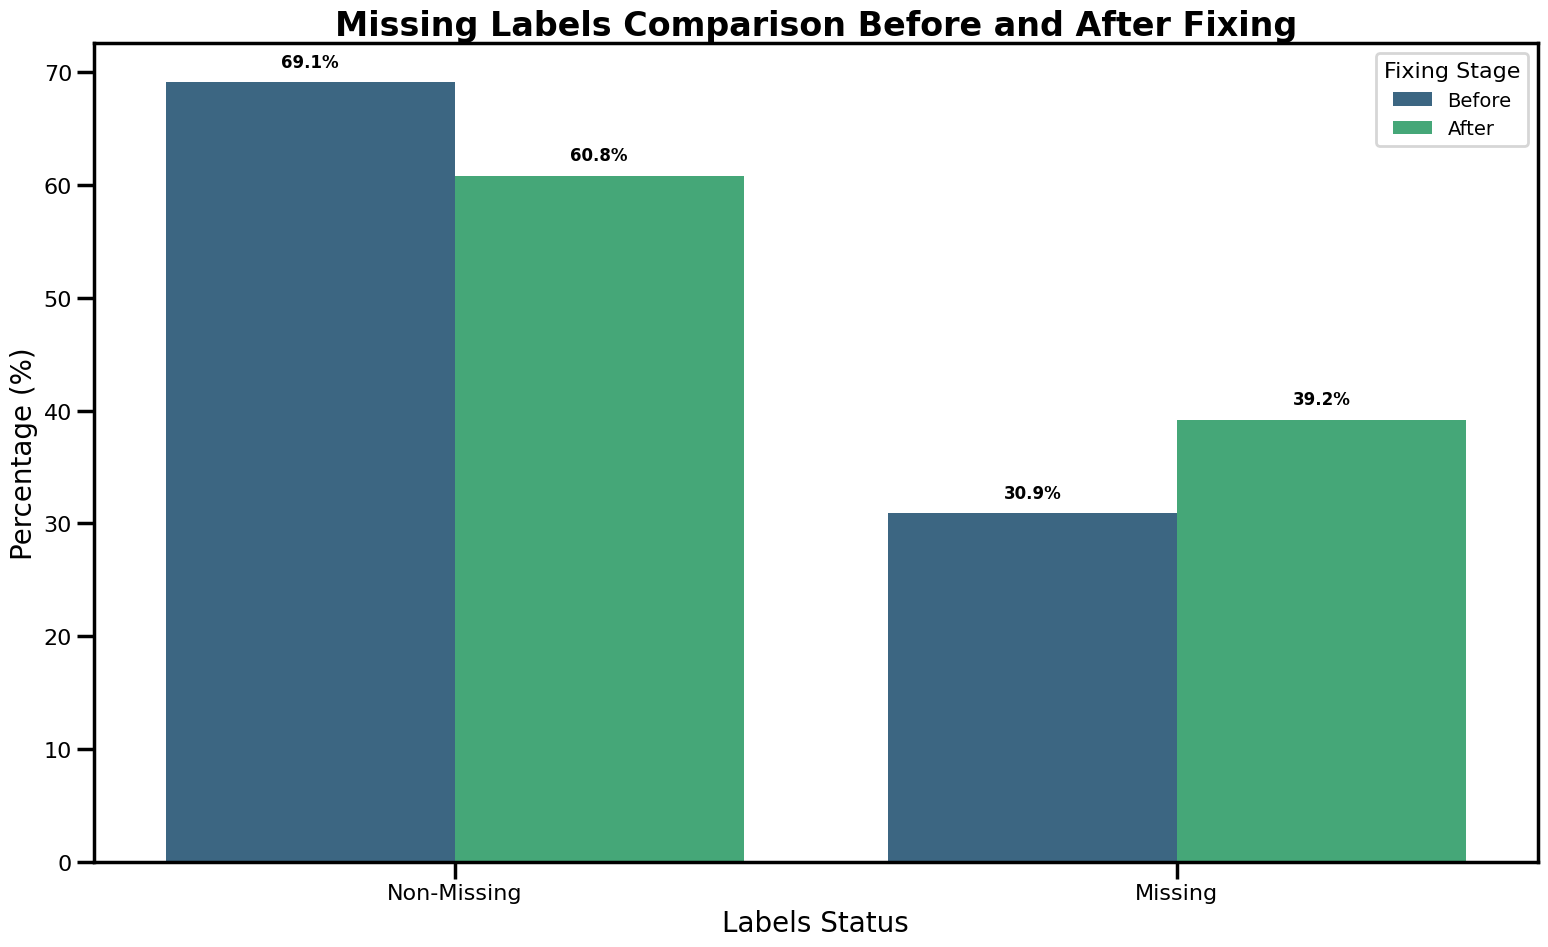

In [22]:


# Prepare data for plotting

counts_before = df_train_csv['sii'].isna().value_counts(normalize=True) * 100

counts_after = df_train_csv['Severity Impairment Index (SII)'].isna().value_counts(normalize=True) * 100



# Ensure both categories are represented

counts_before = counts_before.reindex([False, True], fill_value=0)

counts_after = counts_after.reindex([False, True], fill_value=0)



# Set up the plot style for professional presentation

sns.set_context("poster")



# Seaborn barplot version

plt.figure(figsize=(16, 10))



# Prepare data for plotting

plot_data = pd.DataFrame({

    'Missing Status': ['Non-Missing', 'Missing'],

    'Before': [counts_before[False], counts_before[True]],

    'After': [counts_after[False], counts_after[True]]

})



# Melt the DataFrame for easier plotting

plot_data_melted = plot_data.melt(

    id_vars='Missing Status',

    var_name='Stage',

    value_name='Percentage'

)



# Create the bar plot

ax = sns.barplot(

    x='Missing Status',

    y='Percentage',

    hue='Stage',

    data=plot_data_melted,

    palette='viridis'

)



# Customize the plot

plt.title('Missing Labels Comparison Before and After Fixing', fontsize=24, fontweight='bold')

plt.xlabel('Labels Status', fontsize=20)

plt.ylabel('Percentage (%)', fontsize=20)

plt.xticks(fontsize=16)

plt.yticks(fontsize=16)



# Add percentage annotations

# Add percentage annotations with correct alignment

bar_width = 0.4  # Matches bar width in the grouped plot

for i, status in enumerate(['Non-Missing', 'Missing']):

    status_data = plot_data_melted[plot_data_melted['Missing Status'] == status]

    for j, row in enumerate(status_data.itertuples()):

        # Calculate position for each group

        x_pos = i - bar_width / 2 + j * bar_width  # Adjust for grouped bars

        plt.text(

            x_pos,

            row.Percentage + 1,  # Place the text slightly above the bar

            f'{row.Percentage:.1f}%',

            ha='center',

            va='bottom',

            fontsize=12,

            fontweight='bold'

        )



plt.legend(title='Fixing Stage', title_fontsize=16, fontsize=14, loc='upper right')

plt.tight_layout()

plt.show()


## DROP INCORRECT SII

In [23]:
df_train_csv = df_train_csv.dropna(subset=['sii'])

In [24]:
# Rename columns for clarity in the heatmap

df_corr = df_train_csv.rename(

    columns={

        'Age of participant': 'Age',

        'Hours of using computer/internet': 'Internet Hours/Day',

    }

)

df_corr['Internet Hours/Day']

0       3.0
1       0.0
2       2.0
3       0.0
5       0.0
       ... 
3953    2.0
3954    0.0
3955    1.0
3957    0.0
3958    1.0
Name: Internet Hours/Day, Length: 2736, dtype: float64

## Correlation Between Age, Internet Usage, and SII

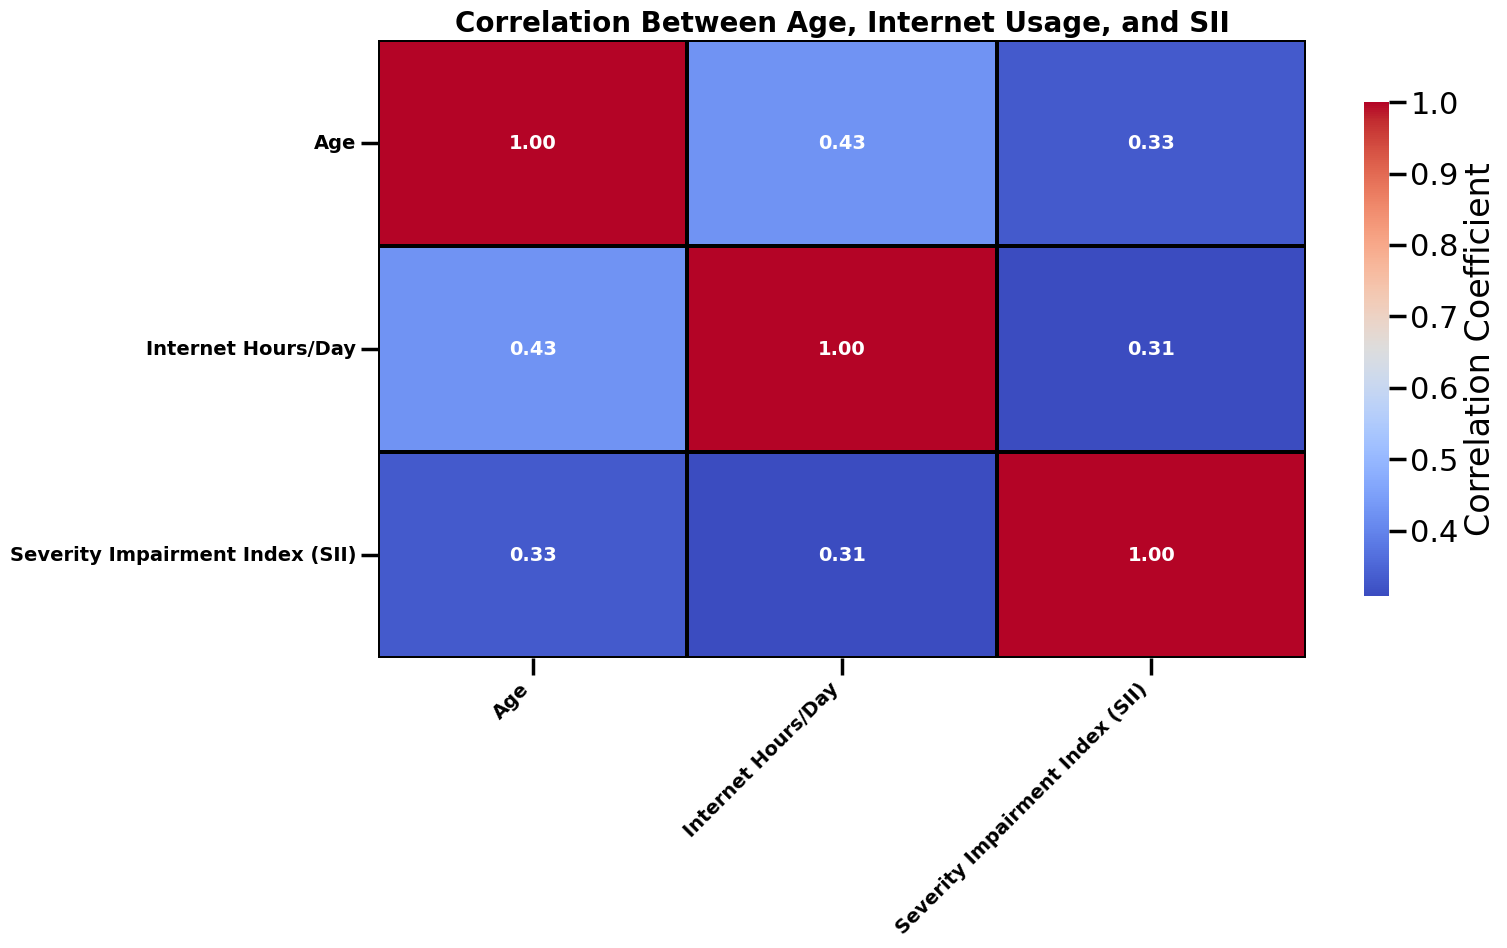

In [25]:
# Rename columns for clarity in the heatmap

df_corr = df_train_csv.rename(

    columns={

        'Age of participant': 'Age',

        'Hours of using computer/internet': 'Internet Hours/Day',

    }

)

# Calculate the correlation matrix

corr_data = df_corr[['Age', 'Internet Hours/Day', 'Severity Impairment Index (SII)']].corr()



# Create a heatmap with professional styling

plt.figure(figsize=(16, 10))

sns.heatmap(

    corr_data,

    annot=True,

    cmap='coolwarm',

    fmt='.2f',

    linewidths=1.5,

    linecolor='black',

    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},

    annot_kws={'fontsize': 14, 'fontweight': 'bold'}

)



# Add titles and labels

plt.title('Correlation Between Age, Internet Usage, and SII', fontsize=20, fontweight='bold')

plt.xticks(fontsize=14, rotation=45, ha='right', fontweight='bold')

plt.yticks(fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()


## Distribution of SII Levels by Age Group and Internet Usage Hours

/tmp/ipykernel_24/1877656720.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df_train_csv.groupby(
/tmp/ipykernel_24/1877656720.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pivot_data.pivot_table(


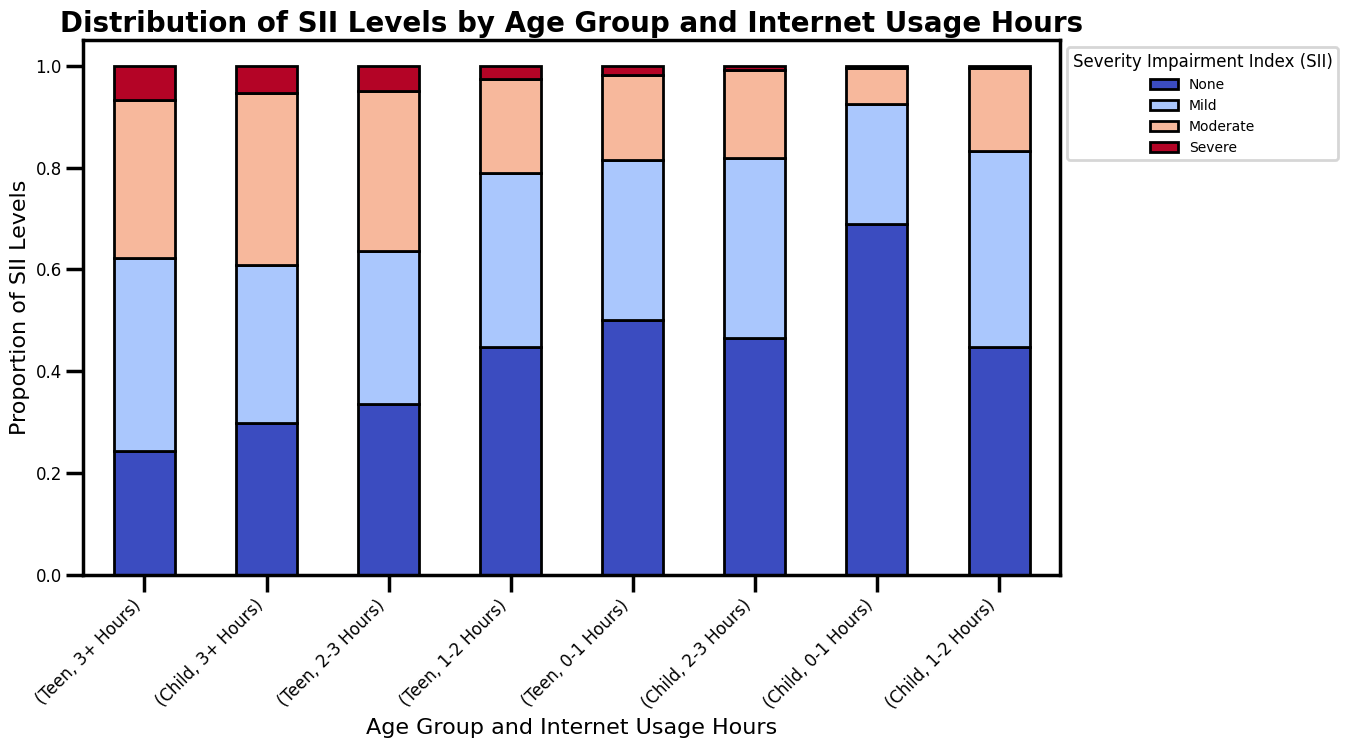

In [26]:


# Group data and calculate the distribution of SII

pivot_data = df_train_csv.groupby(

    ['Age Group', 'Hours of using computer/internet', 'Severity Impairment Index (SII)']

).size().reset_index(name='Count')



# Replace the 'Hours of using computer/internet' with descriptive labels

pivot_data['Hours of using computer/internet'] = pivot_data['Hours of using computer/internet'].map(internet_hours_mapping)



# Pivot table

pivot_table = pivot_data.pivot_table(

    index=['Age Group', 'Hours of using computer/internet'],

    columns='Severity Impairment Index (SII)',

    values='Count',

    fill_value=0

)



# Normalize the data to proportions

pivot_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0)



# Sort rows explicitly by SII = 3.0 values

if 3.0 in pivot_normalized.columns:

    pivot_normalized = pivot_normalized.sort_values(by=3.0, ascending=False)



# Plot the Stacked Bar Plot

fig, ax = plt.subplots(figsize=(14, 8))

pivot_normalized.plot(

    kind='bar',

    stacked=True,

    colormap='coolwarm',

    edgecolor='black',

    ax=ax

)



# Customizations

plt.title('Distribution of SII Levels by Age Group and Internet Usage Hours', fontsize=20, fontweight='bold')

plt.xlabel('Age Group and Internet Usage Hours', fontsize=16)

plt.ylabel('Proportion of SII Levels', fontsize=16)

plt.xticks(fontsize=12, rotation=45, ha='right')

plt.yticks(fontsize=12)



# Rename legend entries for clarity

handles, labels = ax.get_legend_handles_labels()



labels = [sii_labels_mapping.get(label, label) for label in labels]



plt.legend(

    handles=handles,

    labels=labels,

    title='Severity Impairment Index (SII)',

    title_fontsize=12,

    fontsize=10,

    loc='upper left',

    bbox_to_anchor=(1, 1)

)

# save to pdf

plt.savefig('distribution_of_sii_levels_by_age_group_and_internet_usage_hours.pdf', dpi = 600, bbox_inches='tight')

# Layout adjustments

plt.tight_layout()

plt.show()


## Age Distribution by Severity Impairment Index


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


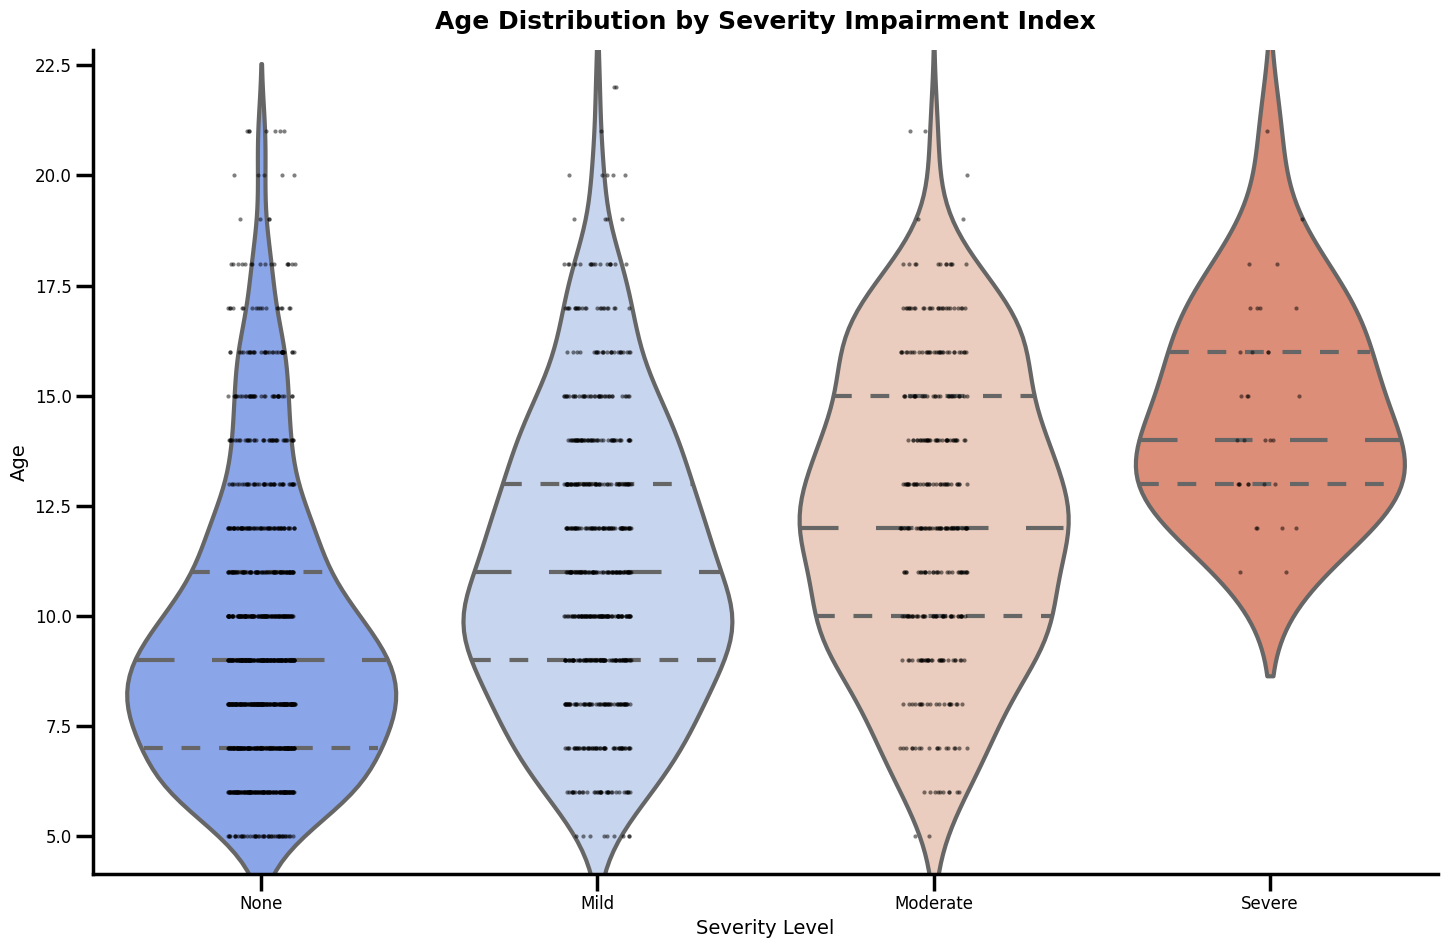

In [27]:
# Violin plot for age distribution by severity impairment index

plt.figure(figsize=(15, 10))

sns.violinplot(

    data=df_train_csv,

    x='Severity Impairment Index (SII)',

    y='Age of participant',

    palette='coolwarm',

    inner='quartile',

    scale='width'

)

sns.stripplot(

    data=df_train_csv,

    x='Severity Impairment Index (SII)',

    y='Age of participant',

    color='black',

    size=3,

    alpha=0.5,

    jitter=True

)

# update x values to mapped sii

plt.xticks(ticks=[0, 1, 2, 3], labels=['None', 'Mild', 'Moderate', 'Severe'])

plt.title('Age Distribution by Severity Impairment Index', fontsize=18, fontweight='bold', pad=15)

plt.xlabel('Severity Level', fontsize=14)

plt.ylabel('Age', fontsize=14)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

sns.despine()

# save

plt.savefig('age_distribution_by_sii.pdf', dpi = 600, bbox_inches='tight')

plt.tight_layout()

plt.show()


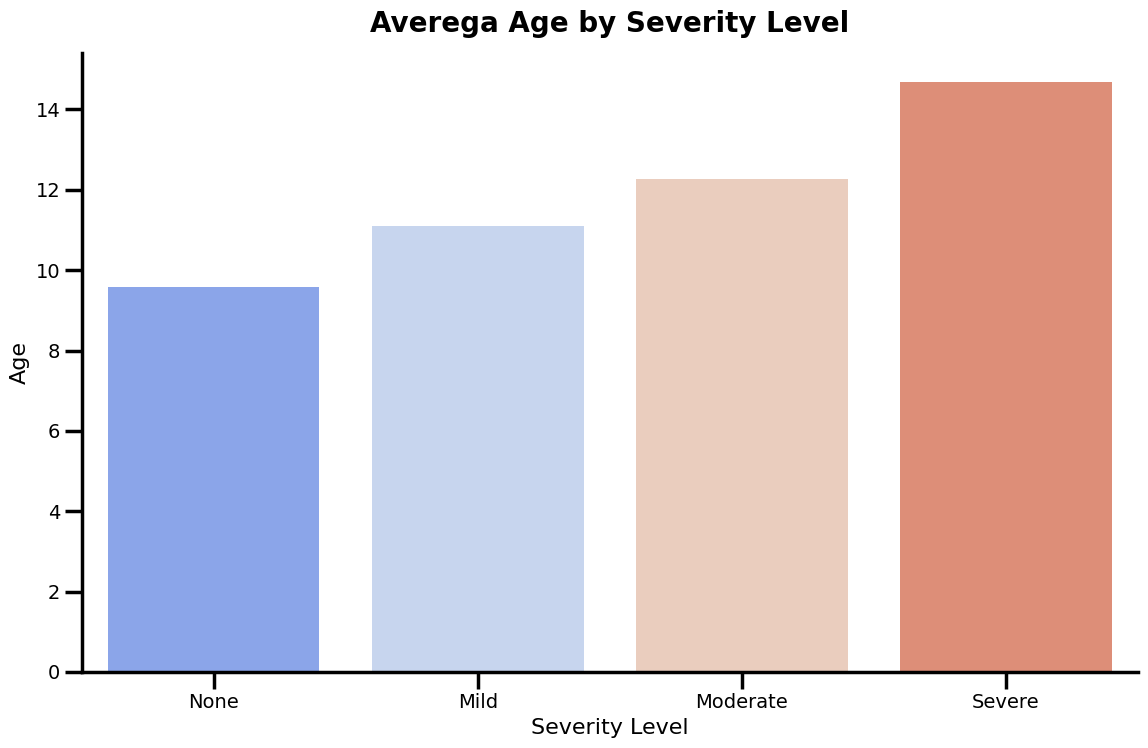

In [28]:
plt.figure(figsize=(12, 8))

summary_stats = df_train_csv.groupby('Severity Impairment Index (SII)')['Age of participant'].agg(['mean']).reset_index()



sns.barplot(

    data=summary_stats.melt(id_vars='Severity Impairment Index (SII)', var_name='Statistic', value_name='Age'),

    x='Severity Impairment Index (SII)',

    y='Age',

    palette='coolwarm',



)

plt.xticks(ticks=[0, 1, 2, 3], labels=['None', 'Mild', 'Moderate', 'Severe'])



plt.title('Averega Age by Severity Level', fontsize=20, fontweight='bold', pad=15)

plt.xlabel('Severity Level', fontsize=16)

plt.ylabel('Age', fontsize=16)

plt.xticks(fontsize=14)

plt.yticks(fontsize=14)

sns.despine()

plt.tight_layout()

plt.show()




## SII Distribution by Age and Internet Usage

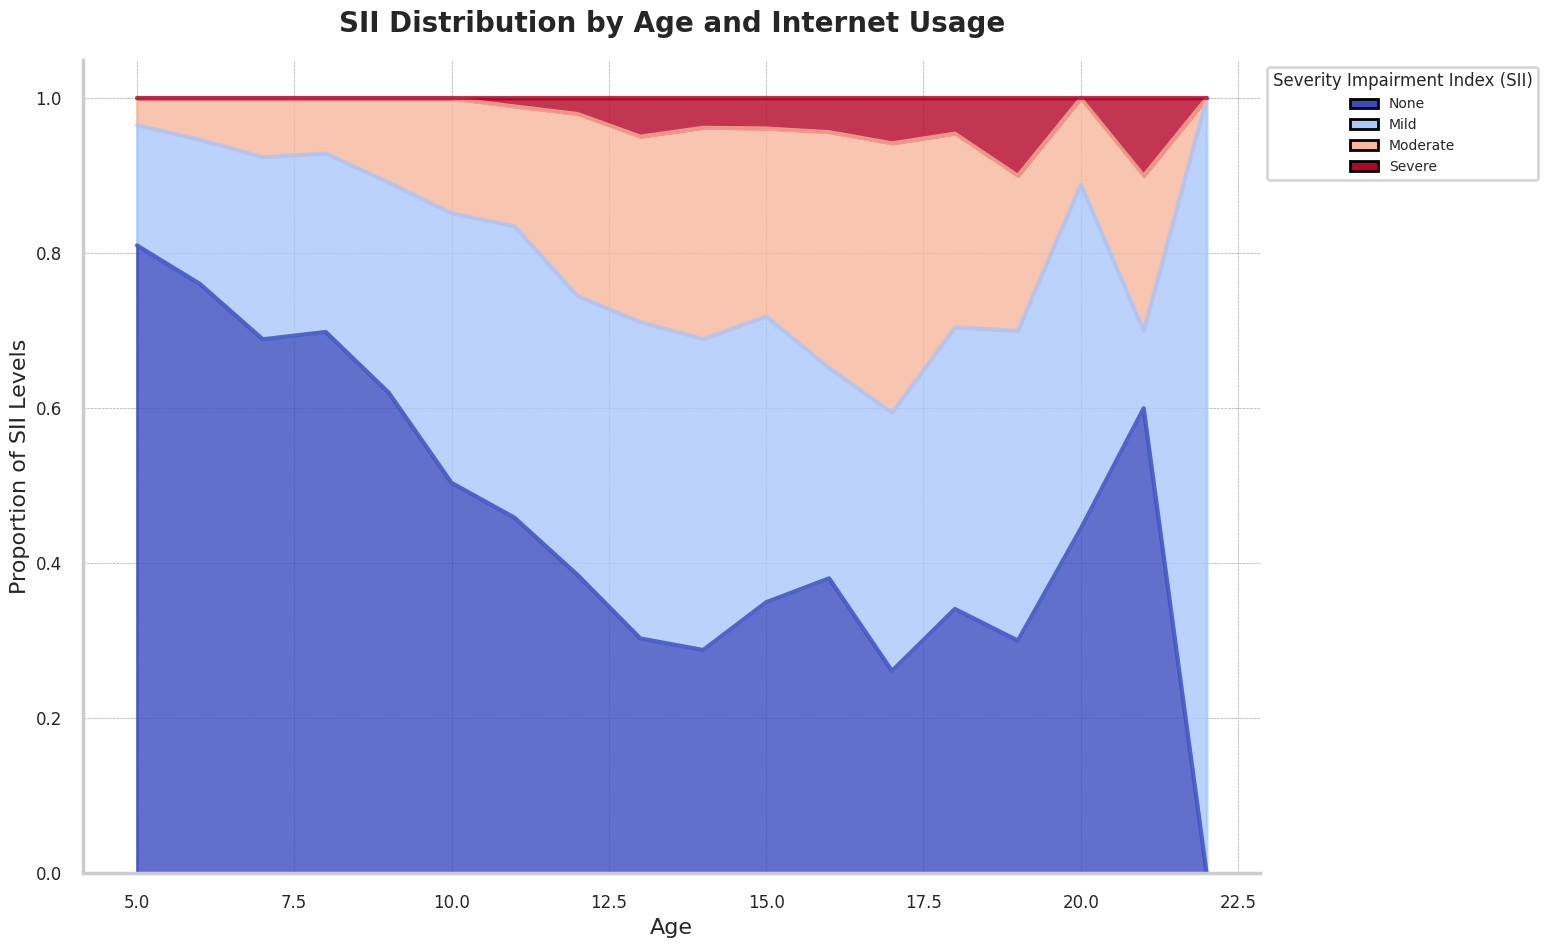

In [29]:
# Group data by age and SII level, summing up the counts of internet usage

sii_age_distribution = df_train_csv.groupby(['Age of participant', 'Severity Impairment Index (SII)'])['Hours of using computer/internet'].count().reset_index(name='Count')



# Pivot the data for stacking

sii_age_pivot = sii_age_distribution.pivot_table(

    index='Age of participant',

    columns='Severity Impairment Index (SII)',

    values='Count',

    fill_value=0

)

# Normalize to get proportions

sii_age_pivot_normalized = sii_age_pivot.div(sii_age_pivot.sum(axis=1), axis=0)

sns.set_style("whitegrid")

# poster

sns.set_context("poster")

# Plot the stacked area chart

sii_age_pivot_normalized.plot(

    kind='area',

    stacked=True,

    colormap='coolwarm',

    alpha=0.8,

    figsize=(16, 10)

)



# Add title and labels

plt.title('SII Distribution by Age and Internet Usage', fontsize=20, fontweight='bold', pad=20)

plt.xlabel('Age', fontsize=16)

plt.ylabel('Proportion of SII Levels', fontsize=16)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

labels = [sii_labels_mapping.get(label, label) for label in labels]



plt.legend(

    handles=handles,

    labels=labels,

    title='Severity Impairment Index (SII)',

    title_fontsize=12,

    fontsize=10,

    loc='upper left',

    bbox_to_anchor=(1, 1)

)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

sns.despine()

plt.tight_layout()

plt.show()


## Proportional Distribution of SII Levels Across Age Groups

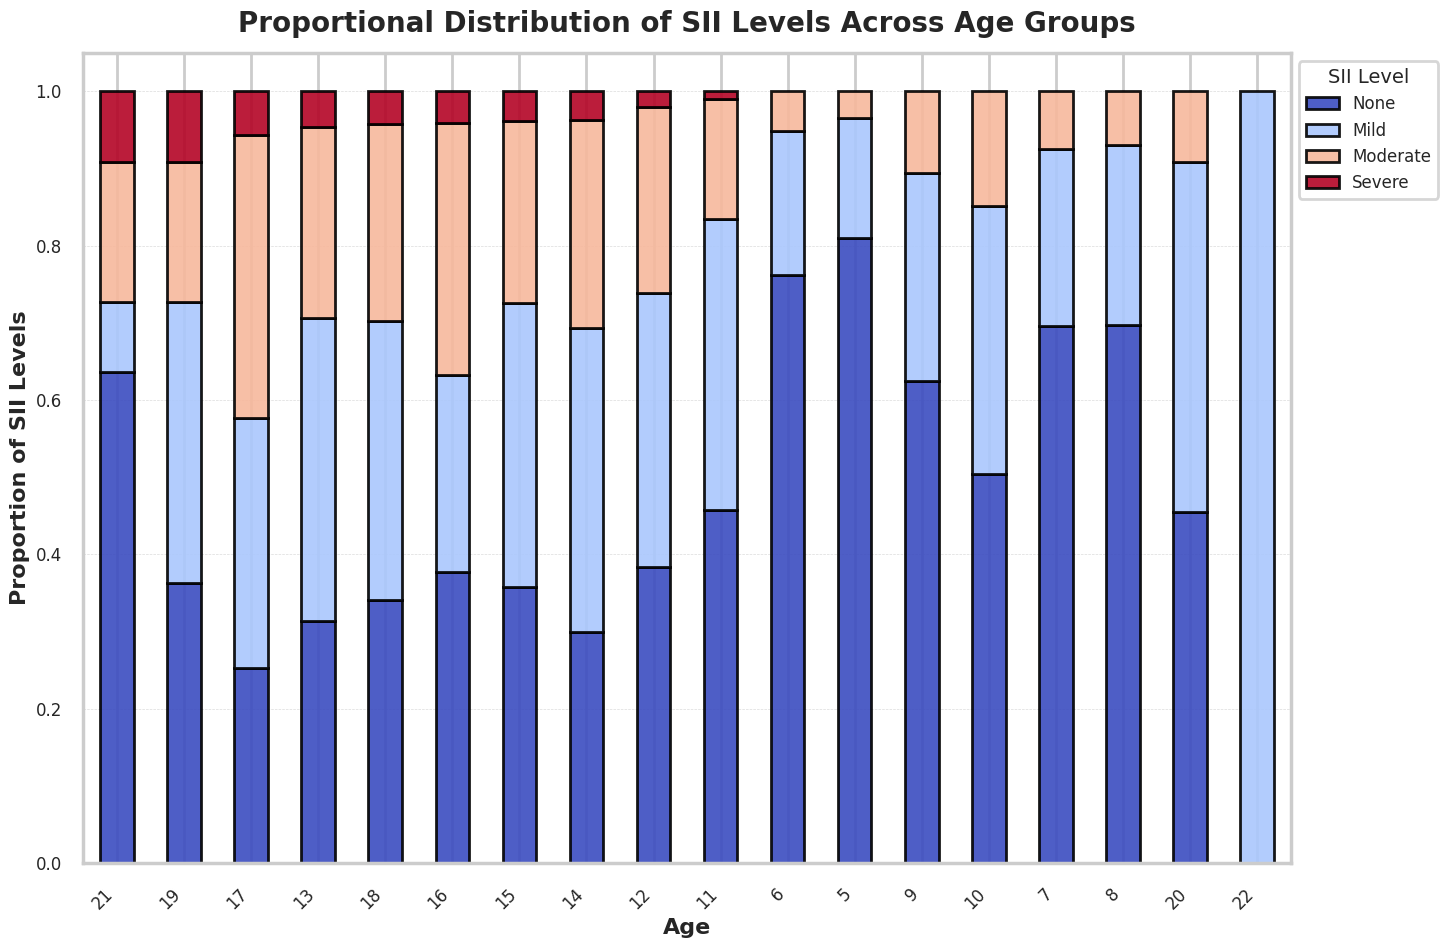

In [30]:


# Aggregate the data to calculate proportions

age_sii_data = df_train_csv.groupby(['Age of participant', 'Severity Impairment Index (SII)']).size().reset_index(name='Count')



# Pivot the data

age_sii_pivot = age_sii_data.pivot(index='Age of participant', columns='Severity Impairment Index (SII)', values='Count').fillna(0)



# Normalize to calculate proportions

age_sii_pivot_normalized = age_sii_pivot.div(age_sii_pivot.sum(axis=1), axis=0)



# Rename columns for better readability

age_sii_pivot_normalized.columns = ['SII 0', 'SII 1', 'SII 2', 'SII 3']



# Sort by SII 3 (Severe) proportions

age_sii_pivot_normalized = age_sii_pivot_normalized.sort_values(by='SII 3', ascending=False)



age_sii_pivot_normalized.plot(

    kind='bar',

    stacked=True,

    colormap='coolwarm',

    edgecolor='black',

    alpha=0.9,figsize=(15, 10

                    )

)



# Add title and labels

plt.title('Proportional Distribution of SII Levels Across Age Groups', fontsize=20, fontweight='bold', pad=15)

plt.xlabel('Age', fontsize=16, fontweight='bold')

plt.ylabel('Proportion of SII Levels', fontsize=16, fontweight='bold')

plt.xticks(fontsize=12, rotation=45, ha='right')

plt.yticks(fontsize=12)



# Customize the legend

plt.legend(

    title='SII Level',

    labels=sii_labels_mapping.values(),

    title_fontsize=14,

    fontsize=12,

    loc='upper left',

    bbox_to_anchor=(1, 1)

)



# Add grid for better readability

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)



# Adjust layout and show

plt.tight_layout()

plt.show()


## Proportional Distribution of SII Levels by Age Group

/tmp/ipykernel_24/2323464676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sii_age_group = df_train_csv.groupby(['Age Group', 'Severity Impairment Index (SII)']).size().reset_index(name='Count')
/tmp/ipykernel_24/2323464676.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sii_age_pivot = sii_age_group.pivot_table(


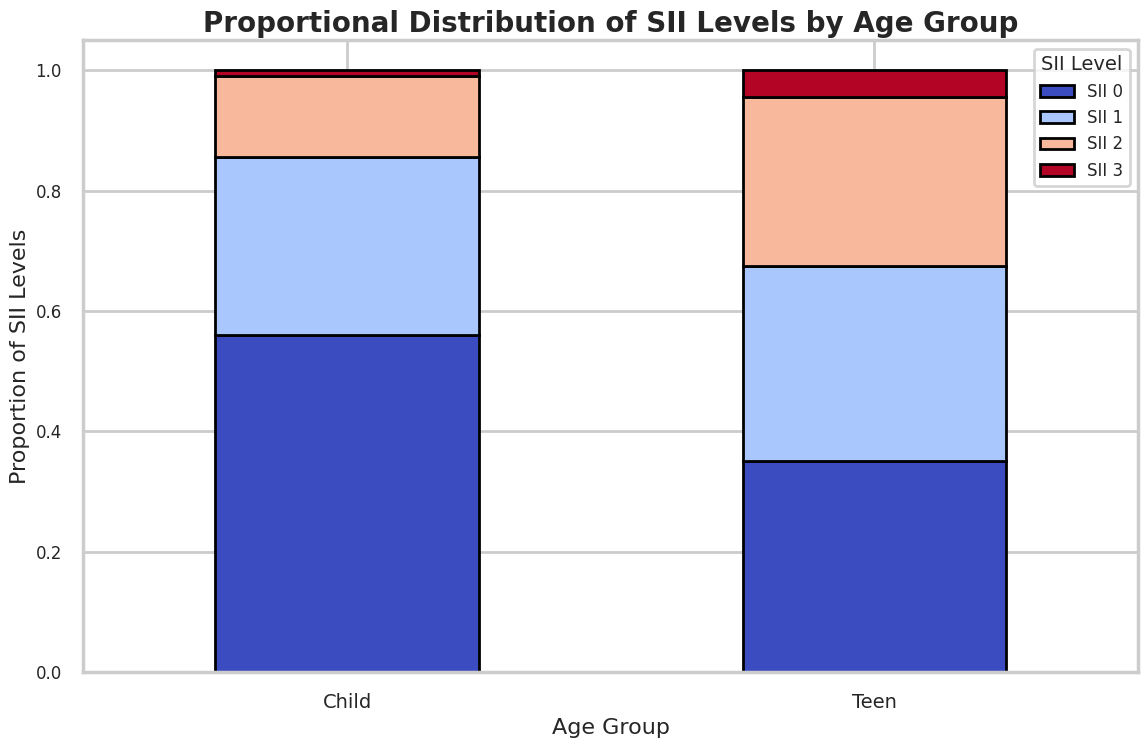

In [31]:
sii_age_group = df_train_csv.groupby(['Age Group', 'Severity Impairment Index (SII)']).size().reset_index(name='Count')

sii_age_pivot = sii_age_group.pivot_table(

    index='Age Group',

    columns='Severity Impairment Index (SII)',

    values='Count',

    fill_value=0

)



# Normalize the data to show proportions

sii_age_pivot_normalized = sii_age_pivot.div(sii_age_pivot.sum(axis=1), axis=0)



# Rename columns for clarity

sii_age_pivot_normalized.columns = ['SII 0', 'SII 1', 'SII 2', 'SII 3']



# Plot the grouped bar chart

sii_age_pivot_normalized.plot(

    kind='bar',

    stacked=True,

    figsize=(12, 8),

    colormap='coolwarm',

    edgecolor='black'

)



# Add labels and title

plt.title('Proportional Distribution of SII Levels by Age Group', fontsize=20, fontweight='bold')

plt.xlabel('Age Group', fontsize=16)

plt.ylabel('Proportion of SII Levels', fontsize=16)

plt.xticks(fontsize=14, rotation=0)

plt.yticks(fontsize=12)

plt.legend(

    title='SII Level',

    fontsize=12,

    title_fontsize=14,

    loc='upper right'

)

plt.tight_layout()

plt.show()


## USE PCAIT for Data analysis

## Feature Correlations with SII and Internet Hours

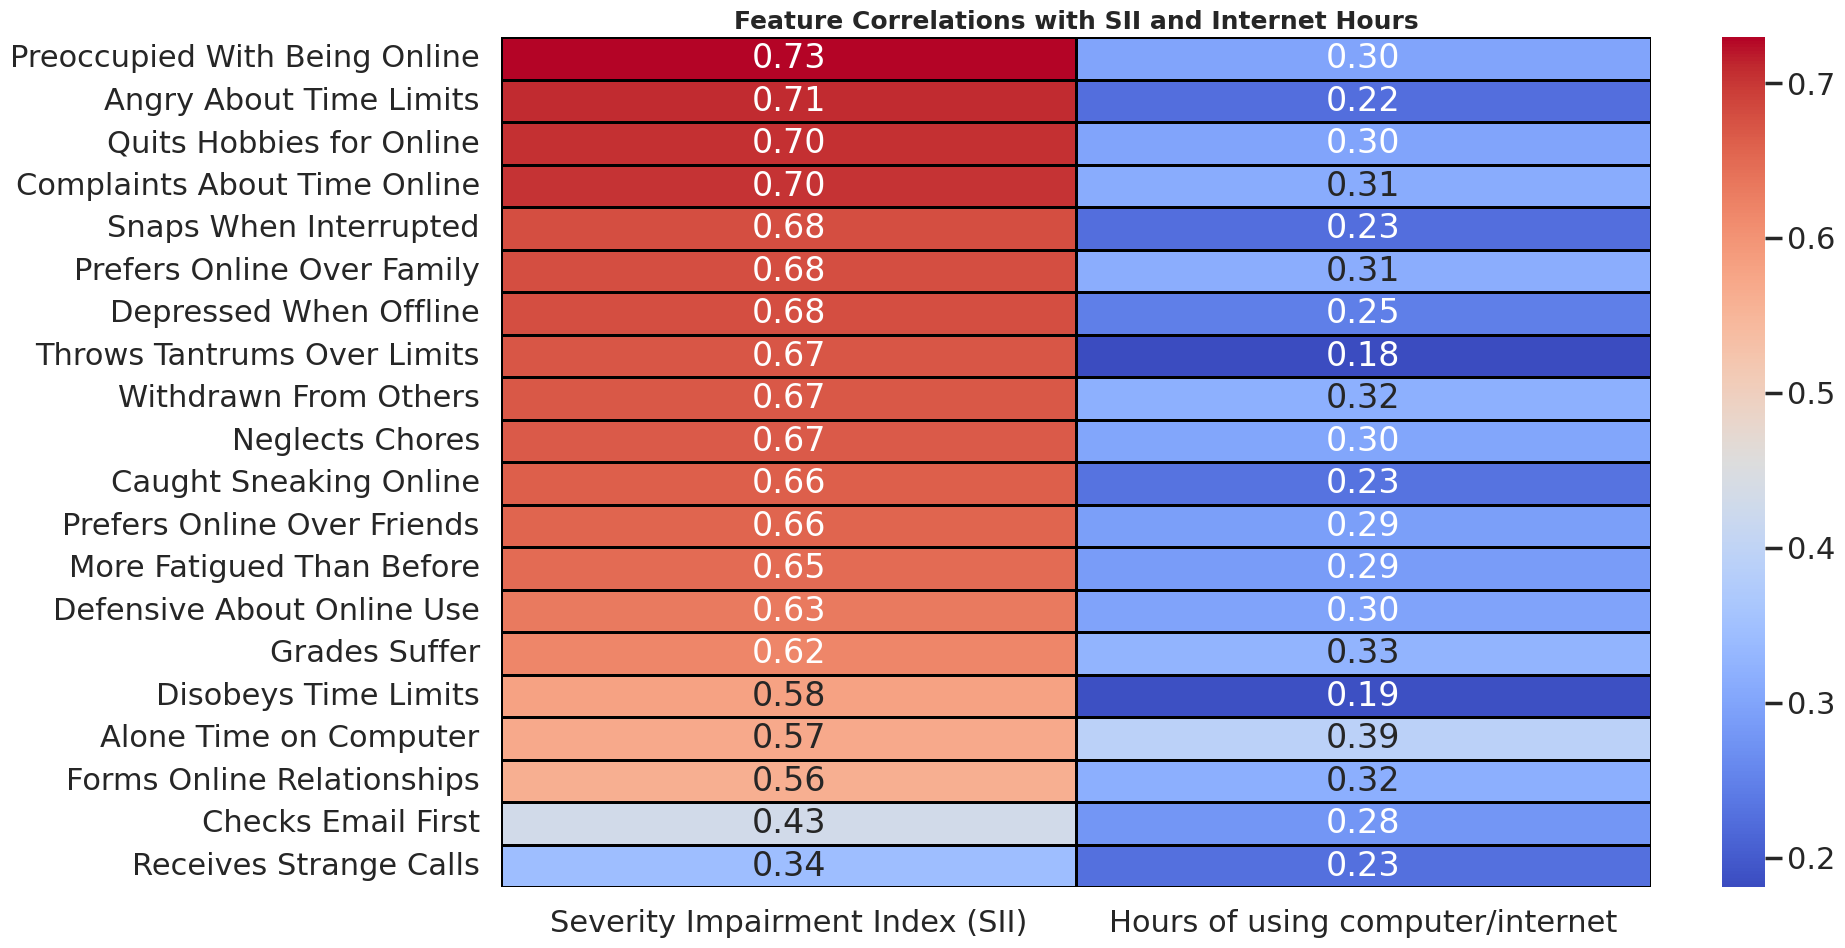

In [32]:
# Calculate correlations with SII and Internet Hours

correlations = df_train_csv[question_columns + ['Hours of using computer/internet', 'Severity Impairment Index (SII)']].corr()

# map the PCIAT questions to meaningful names

mapped_PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]

# Extract correlations for SII and Internet Hours

sii_corr = correlations['Severity Impairment Index (SII)'].drop(['Hours of using computer/internet', 'Severity Impairment Index (SII)'])

internet_corr = correlations['Hours of using computer/internet'].drop(['Hours of using computer/internet', 'Severity Impairment Index (SII)'])



# Combine results into a DataFrame

correlation_summary = pd.DataFrame({

    'SII Correlation': sii_corr,

    'Internet Hours Correlation': internet_corr

}).sort_values(by='SII Correlation', ascending=False)

sorted_questions = correlation_summary.index  # Sort rows by SII Correlation

sorted_heatmap = correlations.loc[sorted_questions, ['Severity Impairment Index (SII)', 'Hours of using computer/internet']]



# Plot heatmap for correlation matrix

plt.figure(figsize=(20, 10))

sns.heatmap(sorted_heatmap,

            annot=True, fmt=".2f", cmap='coolwarm', linewidths=1, linecolor='black')

plt.title('Feature Correlations with SII and Internet Hours', fontsize=18, fontweight='bold')

# save

plt.savefig('feature_correlations_with_sii_and_internet_hours.pdf', dpi = 600, bbox_inches='tight')

plt.tight_layout()

plt.show()




## Do younger children, who are prohibited from accessing the internet, still exhibit addiction-like behaviors through high scores on relevant questions?

## Severity Impairment Index and Question Scores Across Age Groups

/tmp/ipykernel_24/3383606512.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[ 'Severity Impairment Index (SII)'] = df_selected[ 'Severity Impairment Index (SII)'].replace(sii_labels)
/tmp/ipykernel_24/3383606512.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[ 'Severity Impairment Index (SII)'] = pd.Categorical(df_selected[ 'Severity Impairment Index (SII)'], categories=sii_order, ordered=True)
/tmp/ipykernel_24/3383606512.py:61: FutureWarning: The default of observed=False

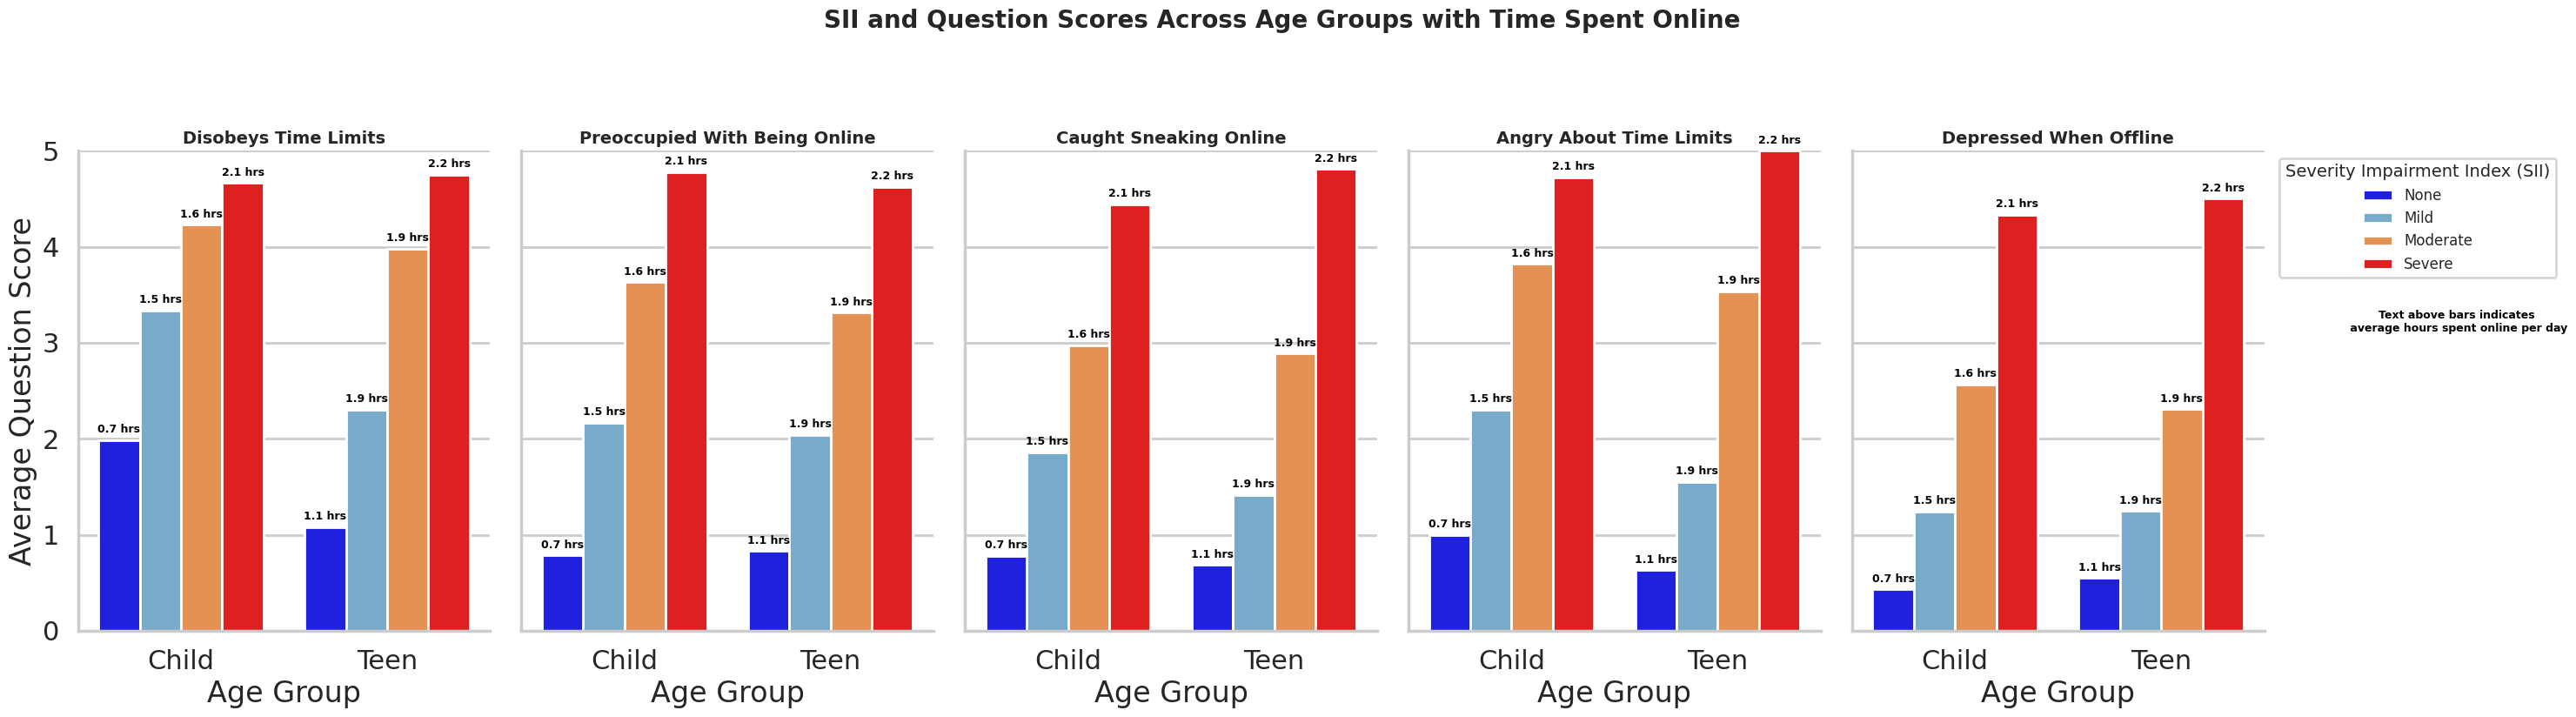

In [33]:


# Map concise labels for relevant questions

relevent_questions = ['Disobeys Time Limits','Preoccupied With Being Online','Caught Sneaking Online','Angry About Time Limits','Depressed When Offline']



# Map descriptive labels for Severity Impairment Index (SII)

sii_labels = {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}



# Custom color palette

sii_palette = {

    'None': 'blue',

    'Mild': '#6baed6',      # Light blue

    'Moderate': '#fd8d3c',  # Orange

    'Severe': 'red'

}



# Define order for SII

sii_order = ['None', 'Mild', 'Moderate', 'Severe']



# Select only the relevant columns and rename

df_selected = df_train_csv[['Age Group',  'Severity Impairment Index (SII)', 'Hours of using computer/internet'] + relevent_questions]



# Replace SII values with descriptive labels

df_selected[ 'Severity Impairment Index (SII)'] = df_selected[ 'Severity Impairment Index (SII)'].replace(sii_labels)



# Sort data to ensure proper order

df_selected[ 'Severity Impairment Index (SII)'] = pd.Categorical(df_selected[ 'Severity Impairment Index (SII)'], categories=sii_order, ordered=True)



# Aggregate data: Compute average scores for each question and average internet hours

aggregation_functions = {q: 'mean' for q in relevent_questions}

aggregation_functions['Hours of using computer/internet'] = 'mean'



aggregated_data = df_selected.groupby(['Age Group',  'Severity Impairment Index (SII)']).agg(aggregation_functions).reset_index()



# Melt the aggregated data for easier plotting

df_aggregated_melted = aggregated_data.melt(

    id_vars=['Age Group',  'Severity Impairment Index (SII)', 'Hours of using computer/internet'],

    value_vars=relevent_questions,

    var_name='Question',

    value_name='Average Score'

)



# Create the FacetGrid plot

g = sns.catplot(

    data=df_aggregated_melted,

    x='Age Group',

    y='Average Score',

    hue= 'Severity Impairment Index (SII)',

    hue_order=sii_order,  # Sort SII levels

    col='Question',

    kind='bar',

    palette=sii_palette,  # Apply custom palette

    height=6,

    aspect=1.2,

    legend_out=True

)



# Add text annotations for average internet hours above each bar

for ax, question in zip(g.axes.flat, df_aggregated_melted['Question'].unique()):

    subset = df_aggregated_melted[df_aggregated_melted['Question'] == question]



    for p, (_, row) in zip(ax.patches, subset.iterrows()):

        x_pos = p.get_x() + p.get_width() / 2

        y_pos = p.get_height()

        internet_hours = row['Hours of using computer/internet']



        ax.text(

            x=x_pos,

            y=y_pos + 0.05,

            s=f"{internet_hours:.1f} hrs",

            ha='center',

            va='bottom',

            fontsize=9,

            color='black',

            fontweight='bold'

        )



# Ensure Y-axis ticks are clear and granular

for ax in g.axes.flat:

    ax.set_ylim(0, 5)  # Adjust Y-axis range as needed

    ax.set_yticks(range(0, 6))  # Fixed tick intervals: 0, 1, 2, ..., 5



# Customize the plot

g.fig.suptitle('SII and Question Scores Across Age Groups with Time Spent Online', fontsize=20, fontweight='bold', y=1.05)

g.set_axis_labels('Age Group', 'Average Question Score')

g.set_titles(col_template='{col_name}', size=14, weight='bold')

# Increase figure size

g.fig.set_size_inches(30, 8)  # Width, Height



# Adjust spacing between subplots

handles_labels = g._legend_data.items()

handles_labels = {(k): v for k, v in handles_labels}

labels = handles_labels.keys()

handles = handles_labels.values()



# Adjust and format the legend

g.legend.remove()  # Remove the default legend

plt.legend(

    handles=handles,

    labels=labels,

    title='Severity Impairment Index (SII)',

    loc='upper left',

    bbox_to_anchor=(1.02, 1),

    fontsize=12,

    title_fontsize=14

)

# Final adjustments

# highlight that we have hours spent as well.

# Add a descriptive note to clarify text annotations

# Remove repeated X-axis labels and keep only the bottom row



# Add text below the legend

# Add a descriptive note to clarify text annotations

g.fig.text(

    x=0.95, y=0.6,  # Position at the bottom center

    s="Text above bars indicates\n average hours spent online per day",

    ha='center',

    va='center',

    fontsize=9,

    fontweight='bold',

    color='black'

)





plt.tight_layout()

plt.savefig('age_group_question_scores.pdf', dpi=600, bbox_inches='tight')

plt.show()
